# Computer Vision - Image Classification

In [1]:
#Import dataframe
import pandas as pd
df = pd.read_csv(r"C:\Users\jg\code\templat_reg_and_class\data\computer_vision\labels.csv")

#Change col in df from breed to label
df = df.rename(columns={"breed":"label"})

#Reduce number of breed to make it less computational expensive
labels = ["scottish_deerhound", "maltese_dog", "afghan_hound", "entlebucher", "bernese_mountain_dog"]
df = df[df["label"].isin(labels)].sort_values("id").reset_index(drop=True)

#Add target value y, classes from 0 - 4
df["y"] = df["label"].factorize(sort=True)[0]

#Create a dictonary with labels and belonging class
dic_y_mapping = dict(df[["y", "label"]].drop_duplicates().sort_values("y").values)

print("Dictonary : \n", dic_y_mapping)
print(" ")
print("Dataframe : \n", df.head())

Dictonary : 
 {0: 'afghan_hound', 1: 'bernese_mountain_dog', 2: 'entlebucher', 3: 'maltese_dog', 4: 'scottish_deerhound'}
 
Dataframe : 
                                  id               label  y
0  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound  4
1  00693b8bc2470375cc744a6391d397ec         maltese_dog  3
2  01e787576c003930f96c966f9c3e1d44  scottish_deerhound  4
3  01ee3c7ff9bcaba9874183135877670e         entlebucher  2
4  021b5a49189665c0442c19b5b33e8cf1         entlebucher  2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


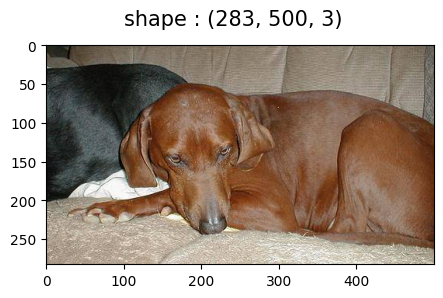

In [5]:
#Load a image
from functions_computer_vision import load_img
img = load_img(file = r"C:\Users\jg\code\templat_reg_and_class\data\computer_vision\train\0a13f9596e03a9f87c96aaff6e057048.jpg")

#Plot image
%load_ext autoreload
from functions_computer_vision import plot_imgs
%autoreload 2
plot_imgs(img, titles= "shape : " + str(img.shape))